# Functions

In [1]:
def valueFilter(dataFrame,columnName,values):
    return dataFrame[~dataFrame[columnName].isin(values)]

# Formating Data

In [2]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statistics
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Import raw datasets

In [3]:
audi_raw = pd.read_csv('data/audi.csv')

In [4]:
bmw_raw = pd.read_csv('data/bmw.csv')

In [5]:
ford_raw = pd.read_csv('data/ford.csv')

In [6]:
hyundi_raw = pd.read_csv('data/hyundi.csv')

In [7]:
merc_raw = pd.read_csv('data/merc.csv')

In [8]:
skoda_raw = pd.read_csv('data/skoda.csv')

In [9]:
toyota_raw = pd.read_csv('data/toyota.csv')

In [10]:
vauxhall_raw = pd.read_csv('data/vauxhall.csv')

In [11]:
vw_raw = pd.read_csv('data/vw.csv')

# Merge into one dataframe

In [12]:
hyundi_raw = hyundi_raw.rename(columns={'tax(£)':'tax'})

In [13]:
df = [audi_raw, bmw_raw, ford_raw, hyundi_raw, merc_raw, skoda_raw, toyota_raw, vauxhall_raw, vw_raw]

In [14]:
cars = pd.concat(df)
cars['model'] = cars['model'].astype('category')
cars['transmission'] = cars['transmission'].astype('category')
cars['fuelType'] = cars['fuelType'].astype('category')
cars['year'] = cars['year'].astype('category')

#cars = valueFilter(cars,"transmission",['Manual','Semi-Auto'])
#cars = valueFilter(cars,"fuelType",['Diesel','Hybrid'])
cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


In [15]:
cars['category'] = ' '
for i in range(0,len(cars)):
    if cars['price'].values[i] < 10000:
        cars['category'].values[i] = 'low-end'
    elif cars['price'].values[i] > 10000 & cars['price'].values[i] < 25000:
        cars['category'].values[i] = 'mid-end'
    else:
        cars['category'].values[i] = 'low-end'

cars['category'].astype('category')
cars_x = cars.drop('price', inplace = False, axis=1)
cars_x = cars_x.drop(['tax', 'mpg','engineSize','category'], inplace = False, axis=1)

cars_y = cars['price']
cars_y2 = cars['category']
cars_x = pd.get_dummies(cars_x)
cars_x

,mileage,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,model_ 8 Series,model_ A Class,...,year_2060,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,15735,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,36203,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,29946,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,25952,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1998,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,74000,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
15153,88102,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15154,70000,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15155,82704,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [16]:
cars_x.shape

(99187, 232)

In [17]:
cars_y.shape

(99187,)

# Regression Model

### Linear Regression

In [18]:
cars_train, cars_test, price_train, price_test = train_test_split(cars_x, cars_y, test_size = 0.3, random_state=101)
cars_train, cars_test, cat_train, cat_test = train_test_split(cars_x, cars_y2, test_size = 0.3, random_state=101)


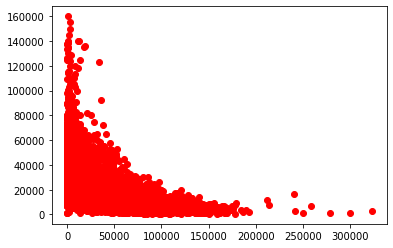

In [19]:
plt.plot(cars.mileage, cars.price, 'ro')

In [20]:
mod = linear_model.LinearRegression()
mod.fit(cars_train, price_train)

LinearRegression()

In [21]:
cars_pred = mod.predict(cars_test)

In [22]:
r2_score(price_test, cars_pred)

0.8380752695828133

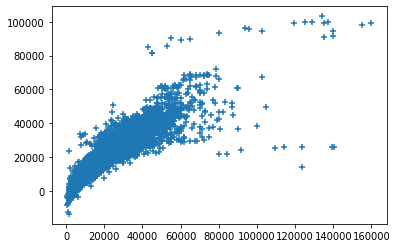

In [23]:
plt.scatter(price_test, cars_pred, marker='+')

### Ridge 

In [24]:
ridge = linear_model.Ridge(alpha = 1.0)
ridge.fit(cars_train, price_train)

Ridge()

In [25]:
cars_pred = ridge.predict(cars_test)

In [26]:
r2_score(price_test, cars_pred)

0.8364918446218176

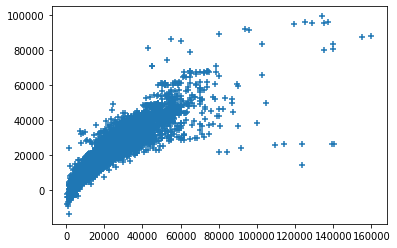

In [27]:
plt.scatter(price_test, cars_pred, marker = '+')

### Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features_train = poly.fit_transform(cars_test)
polyLine = linear_model.LinearRegression()
polyLine.fit(poly_features_train, price_train)



In [ ]:
poly_features_test = poly.fit_transform(cars_test)
cars_pred = polyLine.predict(poly_features_test)
cars_pred.shape


In [ ]:
r2_score(price_test, cars_pred)

In [ ]:
plt.scatter(price_test, cars_pred, marker = '+')

# Classification Model

### K-NN 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(cars_train, cat_train)

In [ ]:
cat = confusion_matrix(cat_test, cat_pred)
cat

In [ ]:
TP = cat[1][1]
TN = cat[0][0]
FP = cat[0][1]
FN = cat[1][0]
accuracy = (TP + TN)/(TP+TN+FP+FN)

In [ ]:
accuracy

### Decision Tree

In [ ]:
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(cars_train, cat_train)

In [ ]:
y_pred = dtree.predict(cars_test)

In [ ]:
cat = confusion_matrix(cat_test, y_pred)
cat

In [ ]:
TP = cat[1][1]
TN = cat[0][0]
FP = cat[0][1]
FN = cat[1][0]
accuracy = (TP + TN)/(TP+TN+FP+FN)

In [ ]:
accuracy